In [1]:
import mplscience
import scanpy as sc
import squidpy as sq

mplscience.set_style()

# config.update("jax_enable_x64", True)
sc.set_figure_params()
%load_ext autoreload
%autoreload 2

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
adata1 = sq.read.visium(
    "/Users/giovanni.palla/Datasets/visium_brain_rep1",
    counts_file="CytAssist_FFPE_Mouse_Brain_Rep1_filtered_feature_bc_matrix.h5",
)
adata2 = sq.read.visium(
    "/Users/giovanni.palla/Datasets/visium_brain_rep2",
    counts_file="CytAssist_FFPE_Mouse_Brain_Rep2_filtered_feature_bc_matrix.h5",
)

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

In [3]:
for adata in [adata1, adata2]:
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    sc.pp.filter_genes(adata, min_counts=10)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.var_names_make_unique()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/ann

In [4]:
import anndata as ad

adata = ad.concat([adata1, adata2], label="batch", keys=["rep1", "rep2"])
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be ch

In [5]:
adata

AnnData object with n_obs × n_vars = 4545 × 16837
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'batch'
    uns: 'neighbors', 'umap'
    obsm: 'spatial', 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


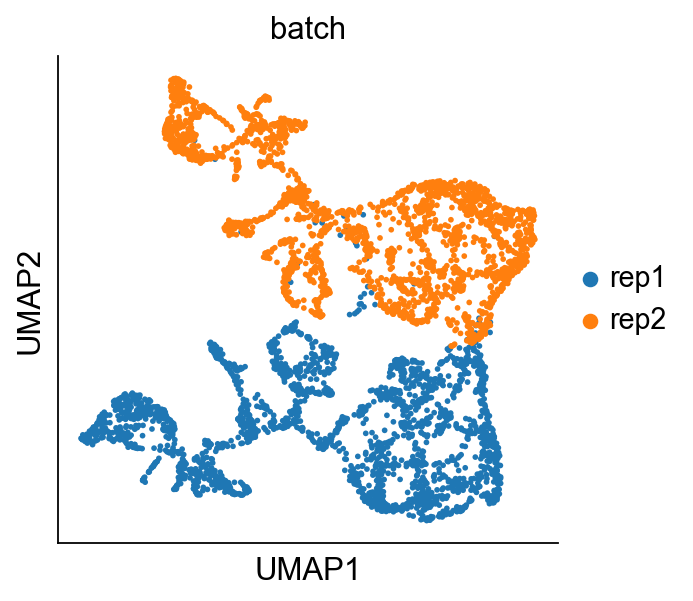

In [6]:
sc.pl.umap(adata, color="batch")

In [7]:
import scanorama

adatas = [adata1, adata2]

# Integration and batch correction.
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 16837 genes among all datasets
[[0.         0.93809524]
 [0.         0.        ]]
Processing datasets (0, 1)


In [8]:
adata1, adata2 = corrected

In [9]:
import numpy as np

theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
adata2.obsm["spatial_r"] = adata2.obsm["spatial"] @ R
adata1.obsm["spatial_r"] = adata1.obsm["spatial"].copy()

In [10]:
adata = ad.concat(
    [adata1, adata2],
    label="batch",
    keys=[list(adata1.uns["spatial"].keys())[0], list(adata2.uns["spatial"].keys())[0]],
    uns_merge="unique",
)
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


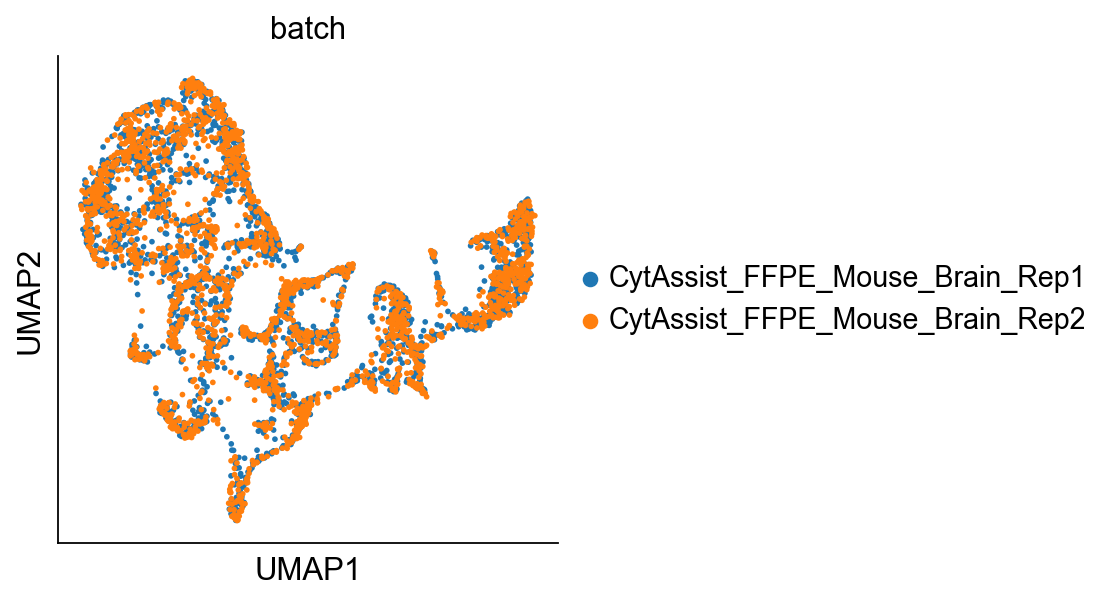

In [11]:
sc.pl.umap(adata, color="batch")

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


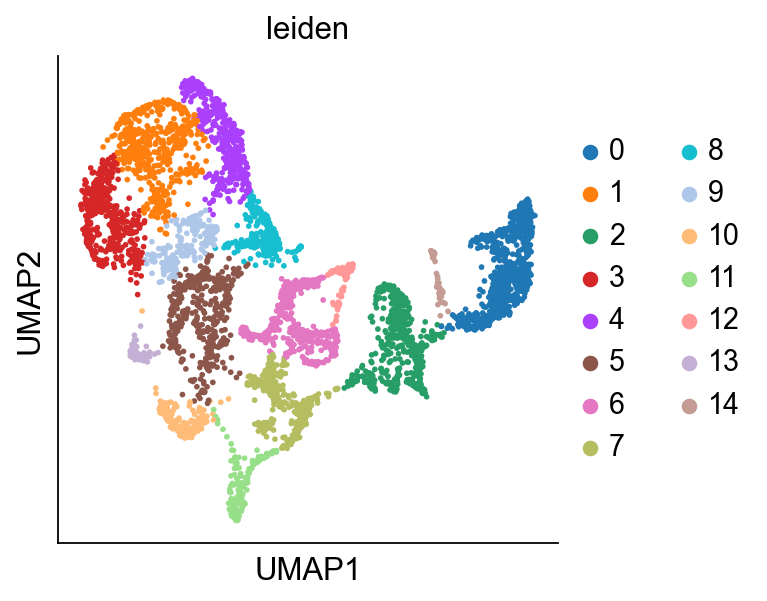

In [14]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden")

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:388: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if key not in adata.obs or not is_categorical_dtype(adata.obs[key]):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pan

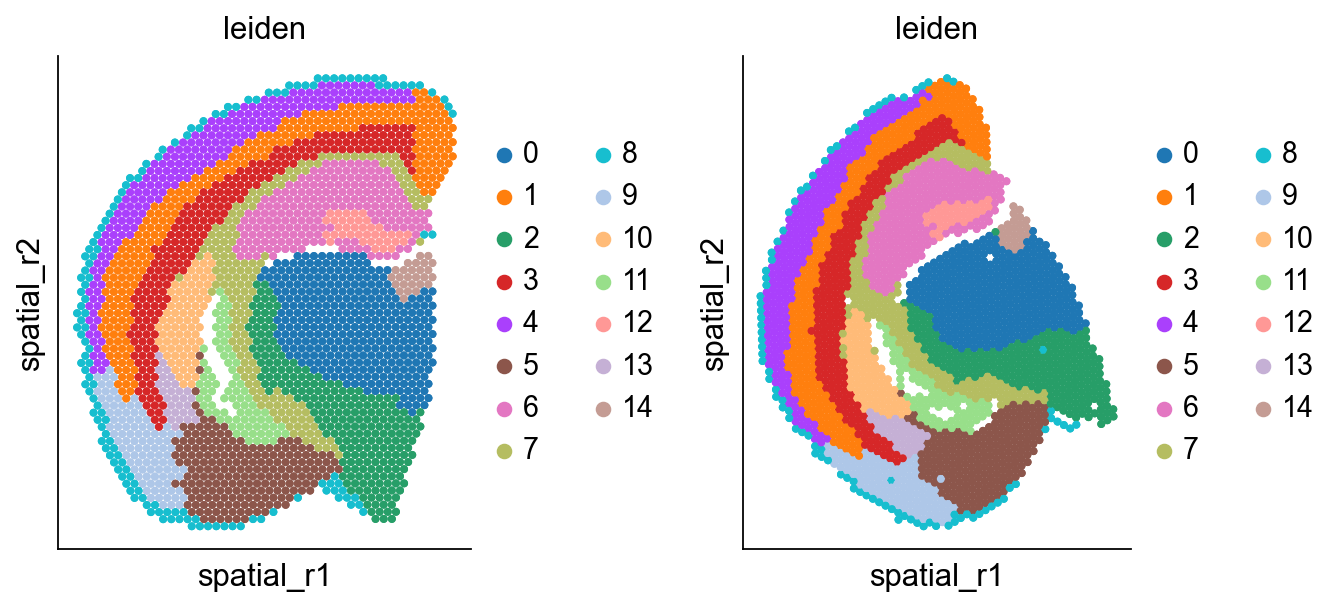

In [16]:
sq.pl.spatial_scatter(
    adata,
    color="leiden",
    library_key="batch",
    img=False,
    spatial_key="spatial_r",
    shape=None,
)

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:388: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if key not in adata.obs or not is_categorical_dtype(adata.obs[key]):
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and w

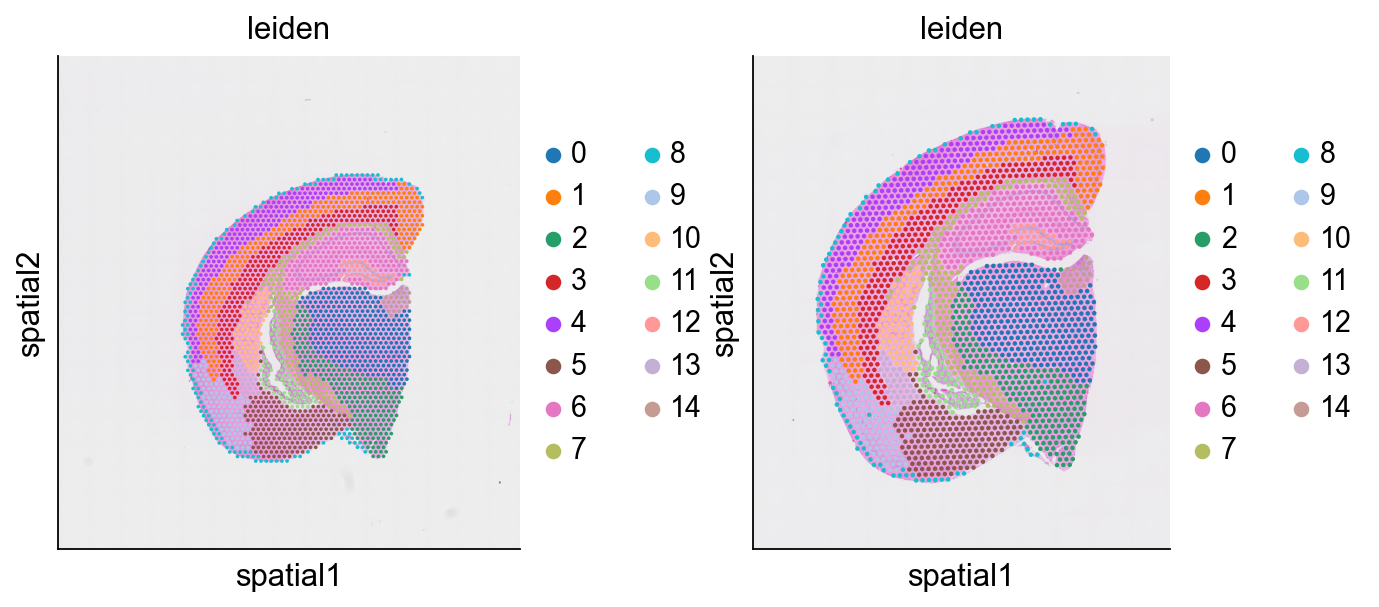

In [17]:
sq.pl.spatial_scatter(adata, color="leiden", library_key="batch")

In [18]:
adata.write("/Users/giovanni.palla/Datasets/visium_rep12.h5ad")